# Real Estate Price Prediction - Linear Regression Analysis

This notebook evaluates the assumptions of linear regression before training a model on the real estate dataset.

## Linear Regression Assumptions:
1. **Linearity**: The relationship between predictors and target is linear
2. **Independence of Errors**: Residuals are not correlated with each other
3. **Constant Variance of Errors (Homoscedasticity)**: Residuals have constant variance
4. **Normality of Errors**: Residuals follow a normal distribution
5. **No Multicollinearity**: Predictor variables are not highly correlated with each other

In [3]:
# Install required libraries (run this cell if packages are not installed)
!pip install pandas numpy matplotlib seaborn scikit-learn scipy statsmodels

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------------- -------------- 5.2/8.1 MB 37.3 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 40.3 MB/s  0:00:00
   ---------------------------------------- 0.0/37.1 MB ? eta -:--:--
   -------------- ------------------------- 13.4/37.1 MB 67.9 MB/s eta 0:00:01
   ----------------------------- ---------- 27.3/37.1 MB 67.7 MB/s eta 0:00:01
   ---------------------------------------  37.0/37.1 MB 67.0 MB/s eta 0:00:01
   ---------------------------------------- 37.1/37.1 MB 59.9 MB/s  0:00:00
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 9.6/9.6 MB 57.3 MB/s  0:00:00

   ------ --------------------------------- 1/6 [scipy]
   ------ --------------------------------- 1/6 [scipy]
   ------ --------------------------------- 1/6 [scipy]
   ------ --------------------------------- 1/6 [scipy]
   ------ -------------------

In [29]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from scipy import stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## 1. Load and Explore the Data

In [30]:
# Load the dataset
df = pd.read_csv('Real estate.csv')

# Display first few rows
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (414, 8)

First 5 rows:


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [31]:
# Check data types and missing values
print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Data Types:
No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

Missing Values:
No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


In [32]:
# Rename columns for easier interpretation
df.columns = ['No', 'TransactionDate', 'HouseAge', 'DistanceToMRT', 
              'NumConvenienceStores', 'Latitude', 'Longitude', 'PricePerUnitArea']

# Drop the 'No' column as it's just an index
df = df.drop('No', axis=1)

print("Updated column names:")
print(df.columns.tolist())
df.head()

Updated column names:
['TransactionDate', 'HouseAge', 'DistanceToMRT', 'NumConvenienceStores', 'Latitude', 'Longitude', 'PricePerUnitArea']


,TransactionDate,HouseAge,DistanceToMRT,NumConvenienceStores,Latitude,Longitude,PricePerUnitArea
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [33]:
# Statistical summary
df.describe()

,TransactionDate,HouseAge,DistanceToMRT,NumConvenienceStores,Latitude,Longitude,PricePerUnitArea
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## 2. Prepare Features and Target Variable

In [34]:
# Define features (X) and target (y)
X = df.drop('PricePerUnitArea', axis=1)
y = df['PricePerUnitArea']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")

Features shape: (414, 6)
Target shape: (414,)

Feature columns: ['TransactionDate', 'HouseAge', 'DistanceToMRT', 'NumConvenienceStores', 'Latitude', 'Longitude']


In [35]:
# Train-Test Split (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples ({100*X_train.shape[0]/len(X):.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({100*X_test.shape[0]/len(X):.1f}%)")

Training set size: 331 samples (80.0%)
Test set size: 83 samples (20.0%)


## 3. Train Initial Linear Regression Model (for assumption testing)

We'll train an initial model to compute residuals needed for evaluating some assumptions.

In [36]:
# Train a preliminary linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions and residuals for training data
y_train_pred = model.predict(X_train)
residuals_train = y_train - y_train_pred

# Get predictions and residuals for test data
y_test_pred = model.predict(X_test)
residuals_test = y_test - y_test_pred

print("Model trained successfully!")
print(f"\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercept: {model.intercept_:.6f}")

Model trained successfully!

Model Coefficients:
  TransactionDate: 5.440742
  HouseAge: -0.270791
  DistanceToMRT: -0.004759
  NumConvenienceStores: 1.091425
  Latitude: 229.043054
  Longitude: -29.492591

Intercept: -13044.231917


---
# Assumption 1: Linearity

**Description**: The relationship between predictor variables and the target variable should be linear.

**How to check**: 
- Scatter plots of each feature vs. target
- Residuals vs. Fitted values plot (should show random scatter around zero)

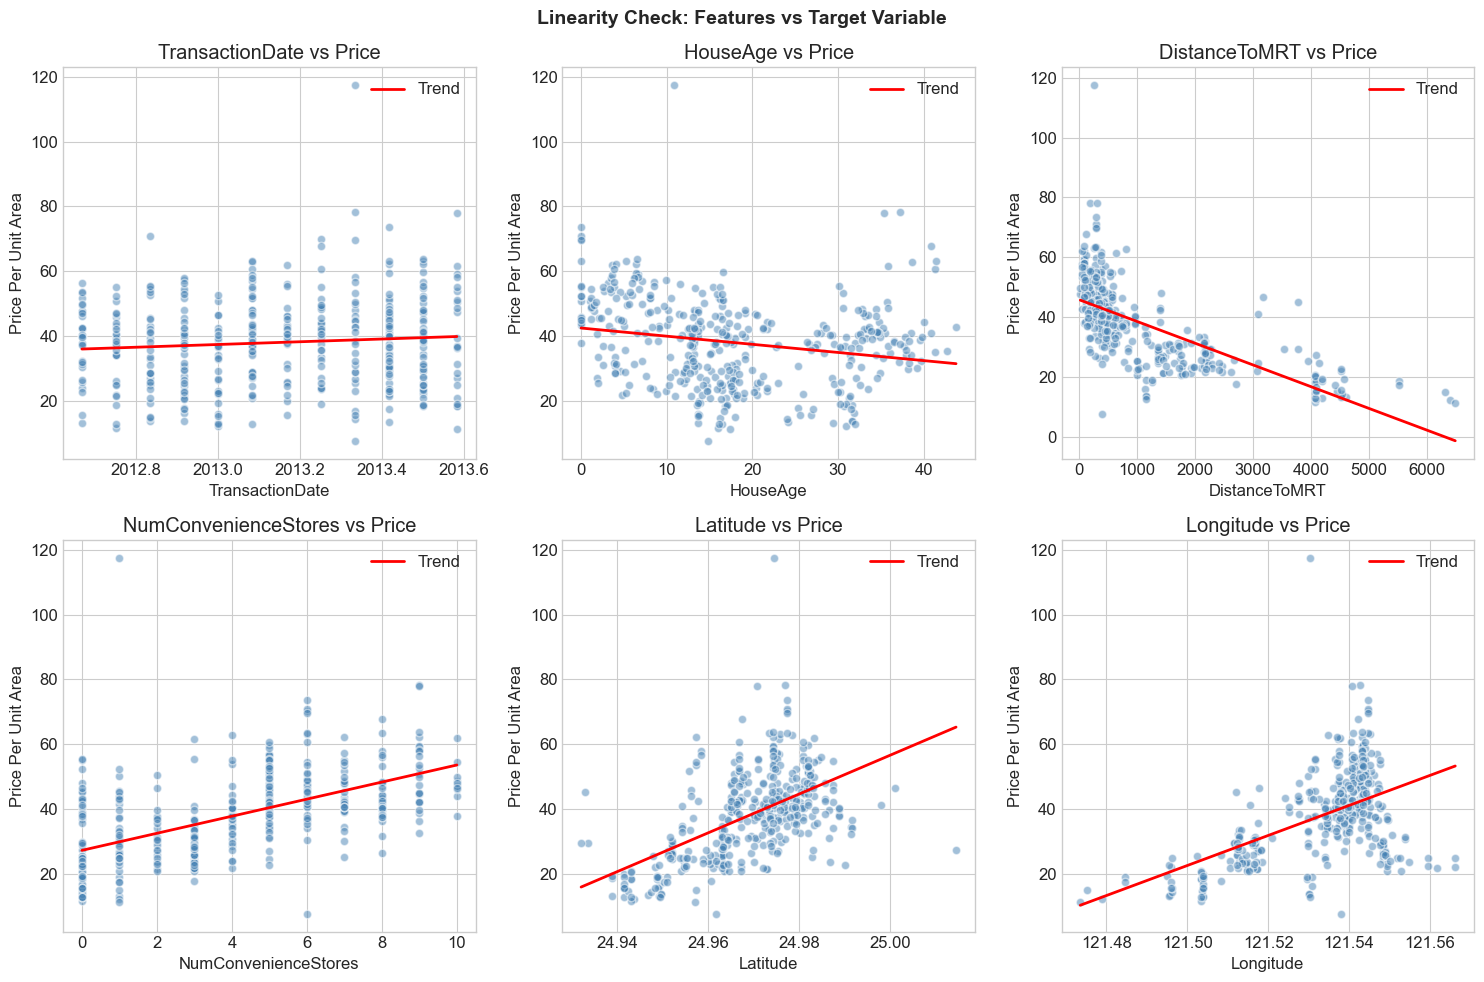

In [37]:
# Scatter plots: Each feature vs Target
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(X.columns):
    axes[idx].scatter(df[col], y, alpha=0.5, color='steelblue', edgecolor='white')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Price Per Unit Area')
    axes[idx].set_title(f'{col} vs Price')
    
    # Add trend line
    z = np.polyfit(df[col], y, 1)
    p = np.poly1d(z)
    axes[idx].plot(sorted(df[col]), p(sorted(df[col])), color='red', linewidth=2, label='Trend')
    axes[idx].legend()

plt.suptitle('Linearity Check: Features vs Target Variable', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

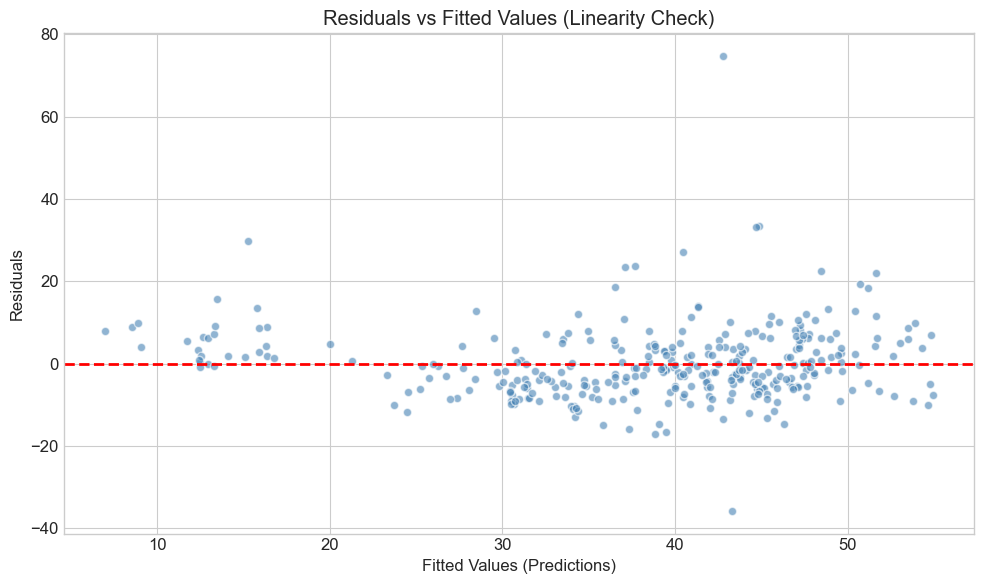


📊 Interpretation:
- If residuals are randomly scattered around zero, the linearity assumption is satisfied.
- If there's a pattern (curved, funnel-shaped), linearity may be violated.


In [38]:
# Residuals vs Fitted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, alpha=0.6, color='steelblue', edgecolor='white')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Fitted Values (Predictions)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (Linearity Check)')
plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("- If residuals are randomly scattered around zero, the linearity assumption is satisfied.")
print("- If there's a pattern (curved, funnel-shaped), linearity may be violated.")

In [39]:
# Calculate correlation coefficients
print("\n📈 Correlation of each feature with target (Price Per Unit Area):")
print("=" * 60)
correlations = df.corr()['PricePerUnitArea'].drop('PricePerUnitArea').sort_values(key=abs, ascending=False)
for feature, corr in correlations.items():
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"  {feature}: {corr:.4f} ({strength} {direction})")


📈 Correlation of each feature with target (Price Per Unit Area):
  DistanceToMRT: -0.6736 (Strong Negative)
  NumConvenienceStores: 0.5710 (Strong Positive)
  Latitude: 0.5463 (Strong Positive)
  Longitude: 0.5233 (Strong Positive)
  HouseAge: -0.2106 (Weak Negative)
  TransactionDate: 0.0875 (Weak Positive)


---
# Assumption 2: Independence of Errors

**Description**: The residuals should be independent of each other (no autocorrelation).

**How to check**: 
- Durbin-Watson test (values close to 2 indicate no autocorrelation)
- Residuals vs. Order plot

In [40]:
# Durbin-Watson Test
dw_statistic = durbin_watson(residuals_train)

print("\n🔬 Durbin-Watson Test for Independence of Errors")
print("=" * 60)
print(f"Durbin-Watson Statistic: {dw_statistic:.4f}")
print("\n📖 Interpretation:")
print("  - DW ≈ 2: No autocorrelation (ideal)")
print("  - DW < 1.5: Positive autocorrelation")
print("  - DW > 2.5: Negative autocorrelation")

if 1.5 <= dw_statistic <= 2.5:
    print(f"\n✅ Result: DW = {dw_statistic:.4f} indicates NO significant autocorrelation.")
elif dw_statistic < 1.5:
    print(f"\n⚠️ Result: DW = {dw_statistic:.4f} indicates POSITIVE autocorrelation may be present.")
else:
    print(f"\n⚠️ Result: DW = {dw_statistic:.4f} indicates NEGATIVE autocorrelation may be present.")


🔬 Durbin-Watson Test for Independence of Errors
Durbin-Watson Statistic: 1.9228

📖 Interpretation:
  - DW ≈ 2: No autocorrelation (ideal)
  - DW < 1.5: Positive autocorrelation
  - DW > 2.5: Negative autocorrelation

✅ Result: DW = 1.9228 indicates NO significant autocorrelation.


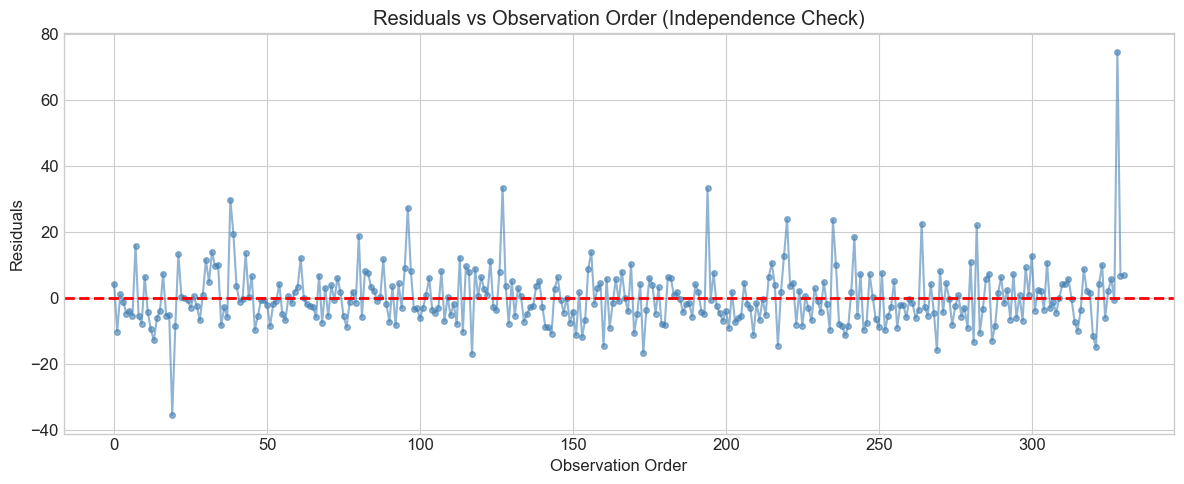


📊 Interpretation:
- If residuals show no pattern across observation order, errors are independent.
- If there's a clear pattern or trend, errors may not be independent.


In [41]:
# Residuals vs Order Plot
plt.figure(figsize=(12, 5))
plt.plot(range(len(residuals_train)), residuals_train.values, marker='o', linestyle='-', 
         alpha=0.6, color='steelblue', markersize=4)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Observation Order')
plt.ylabel('Residuals')
plt.title('Residuals vs Observation Order (Independence Check)')
plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("- If residuals show no pattern across observation order, errors are independent.")
print("- If there's a clear pattern or trend, errors may not be independent.")

---
# Assumption 3: Constant Variance of Errors (Homoscedasticity)

**Description**: The variance of residuals should be constant across all levels of predicted values.

**How to check**: 
- Scale-Location plot (sqrt of standardized residuals vs fitted values)
- Breusch-Pagan test

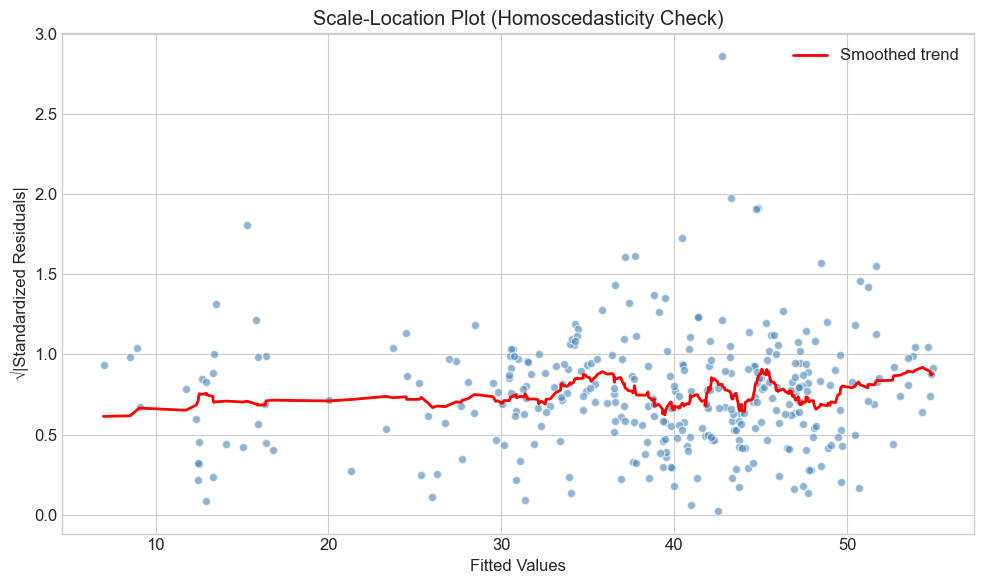


📊 Interpretation:
- If the red line is roughly horizontal, variance is constant (homoscedasticity).
- If there's a clear increasing/decreasing trend, heteroscedasticity may be present.


In [42]:
# Calculate standardized residuals
standardized_residuals = (residuals_train - residuals_train.mean()) / residuals_train.std()

# Scale-Location Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, np.sqrt(np.abs(standardized_residuals)), 
            alpha=0.6, color='steelblue', edgecolor='white')

# Add LOWESS smoothing line
from scipy.ndimage import uniform_filter1d
sorted_idx = np.argsort(y_train_pred)
sorted_pred = y_train_pred[sorted_idx]
sorted_sqrt_resid = np.sqrt(np.abs(standardized_residuals.values))[sorted_idx]
smoothed = uniform_filter1d(sorted_sqrt_resid, size=30)
plt.plot(sorted_pred, smoothed, color='red', linewidth=2, label='Smoothed trend')

plt.xlabel('Fitted Values')
plt.ylabel('√|Standardized Residuals|')
plt.title('Scale-Location Plot (Homoscedasticity Check)')
plt.legend()
plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("- If the red line is roughly horizontal, variance is constant (homoscedasticity).")
print("- If there's a clear increasing/decreasing trend, heteroscedasticity may be present.")

In [43]:
# Breusch-Pagan Test for Homoscedasticity
from scipy.stats import chi2

# Auxiliary regression: regress squared residuals on predictors
squared_residuals = residuals_train ** 2
aux_model = LinearRegression()
aux_model.fit(X_train, squared_residuals)
aux_predictions = aux_model.predict(X_train)

# Calculate R² for auxiliary regression
ss_res_aux = np.sum((squared_residuals - aux_predictions) ** 2)
ss_tot_aux = np.sum((squared_residuals - squared_residuals.mean()) ** 2)
r2_aux = 1 - (ss_res_aux / ss_tot_aux)

# Breusch-Pagan test statistic
n = len(X_train)
bp_statistic = n * r2_aux
df_bp = X_train.shape[1]  # degrees of freedom
p_value_bp = 1 - chi2.cdf(bp_statistic, df_bp)

print("\n🔬 Breusch-Pagan Test for Homoscedasticity")
print("=" * 60)
print(f"Test Statistic: {bp_statistic:.4f}")
print(f"Degrees of Freedom: {df_bp}")
print(f"P-value: {p_value_bp:.4f}")
print("\n📖 Interpretation:")
print("  - H₀: Homoscedasticity (constant variance)")
print("  - H₁: Heteroscedasticity (non-constant variance)")

alpha = 0.05
if p_value_bp > alpha:
    print(f"\n✅ Result: p-value ({p_value_bp:.4f}) > {alpha} → Fail to reject H₀")
    print("   Homoscedasticity assumption is satisfied.")
else:
    print(f"\n⚠️ Result: p-value ({p_value_bp:.4f}) ≤ {alpha} → Reject H₀")
    print("   Heteroscedasticity may be present.")


🔬 Breusch-Pagan Test for Homoscedasticity
Test Statistic: 8.4202
Degrees of Freedom: 6
P-value: 0.2089

📖 Interpretation:
  - H₀: Homoscedasticity (constant variance)
  - H₁: Heteroscedasticity (non-constant variance)

✅ Result: p-value (0.2089) > 0.05 → Fail to reject H₀
   Homoscedasticity assumption is satisfied.


---
# Assumption 4: Normality of Errors

**Description**: The residuals should follow a normal distribution.

**How to check**: 
- Histogram of residuals
- Q-Q (Quantile-Quantile) plot
- Shapiro-Wilk test

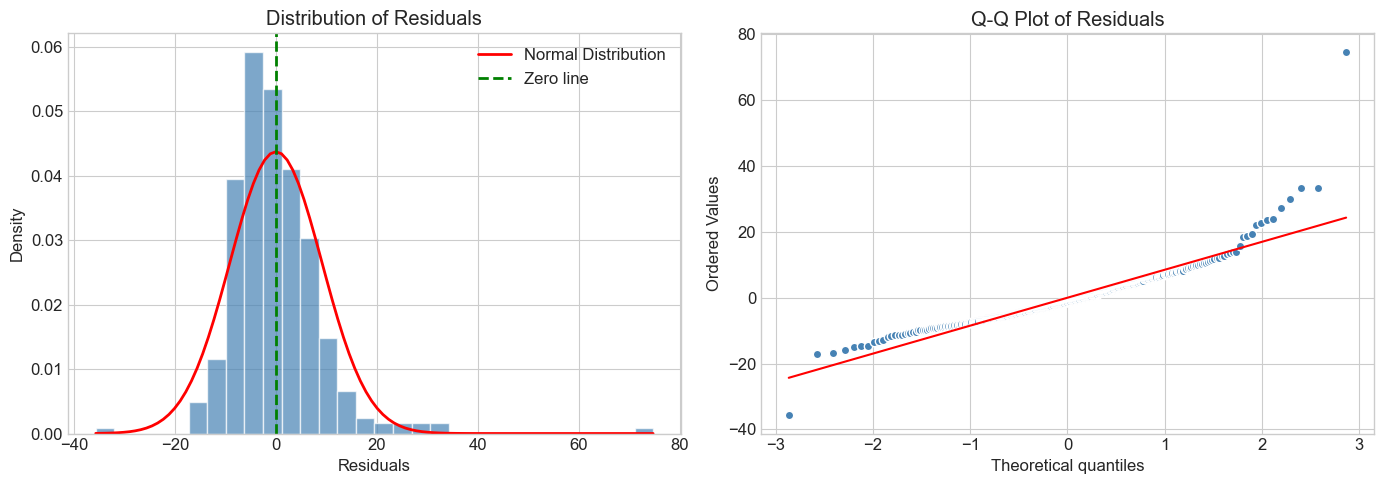


📊 Interpretation:
- Histogram: Residuals should resemble a bell curve centered at zero.
- Q-Q Plot: Points should fall close to the red diagonal line for normality.


In [44]:
# Histogram of Residuals
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(residuals_train, bins=30, color='steelblue', edgecolor='white', density=True, alpha=0.7)

# Overlay normal distribution curve
mu, std = residuals_train.mean(), residuals_train.std()
x = np.linspace(residuals_train.min(), residuals_train.max(), 100)
axes[0].plot(x, stats.norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal Distribution')
axes[0].axvline(x=0, color='green', linestyle='--', linewidth=2, label='Zero line')
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Residuals')
axes[0].legend()

# Q-Q Plot
stats.probplot(residuals_train, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot of Residuals')
axes[1].get_lines()[0].set_markerfacecolor('steelblue')
axes[1].get_lines()[0].set_markeredgecolor('white')
axes[1].get_lines()[1].set_color('red')

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("- Histogram: Residuals should resemble a bell curve centered at zero.")
print("- Q-Q Plot: Points should fall close to the red diagonal line for normality.")

In [45]:
# Shapiro-Wilk Test for Normality
# Note: Shapiro-Wilk works best for n < 5000
shapiro_stat, shapiro_p = stats.shapiro(residuals_train)

print("\n🔬 Shapiro-Wilk Test for Normality of Residuals")
print("=" * 60)
print(f"Test Statistic: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p:.4f}")
print("\n📖 Interpretation:")
print("  - H₀: Residuals are normally distributed")
print("  - H₁: Residuals are not normally distributed")

alpha = 0.05
if shapiro_p > alpha:
    print(f"\n✅ Result: p-value ({shapiro_p:.4f}) > {alpha} → Fail to reject H₀")
    print("   Normality assumption is satisfied.")
else:
    print(f"\n⚠️ Result: p-value ({shapiro_p:.4f}) ≤ {alpha} → Reject H₀")
    print("   Residuals may not be normally distributed.")
    print("   Note: Linear regression is fairly robust to mild violations of normality,")
    print("   especially with larger sample sizes (Central Limit Theorem).")


🔬 Shapiro-Wilk Test for Normality of Residuals
Test Statistic: 0.8638
P-value: 0.0000

📖 Interpretation:
  - H₀: Residuals are normally distributed
  - H₁: Residuals are not normally distributed

⚠️ Result: p-value (0.0000) ≤ 0.05 → Reject H₀
   Residuals may not be normally distributed.
   Note: Linear regression is fairly robust to mild violations of normality,
   especially with larger sample sizes (Central Limit Theorem).


In [46]:
# Additional normality metrics
skewness = stats.skew(residuals_train)
kurtosis = stats.kurtosis(residuals_train)

print("\n📊 Additional Normality Metrics:")
print("=" * 60)
print(f"Skewness: {skewness:.4f} (Normal distribution has skewness ≈ 0)")
print(f"Kurtosis: {kurtosis:.4f} (Normal distribution has kurtosis ≈ 0)")

if abs(skewness) < 0.5:
    print("\n✅ Skewness is within acceptable range (|skewness| < 0.5)")
elif abs(skewness) < 1:
    print("\n⚠️ Moderate skewness detected (0.5 < |skewness| < 1)")
else:
    print("\n❌ High skewness detected (|skewness| > 1)")

if abs(kurtosis) < 1:
    print("✅ Kurtosis is within acceptable range (|kurtosis| < 1)")
elif abs(kurtosis) < 2:
    print("⚠️ Moderate kurtosis detected (1 < |kurtosis| < 2)")
else:
    print("❌ High kurtosis detected (|kurtosis| > 2)")


📊 Additional Normality Metrics:
Skewness: 2.1376 (Normal distribution has skewness ≈ 0)
Kurtosis: 14.3127 (Normal distribution has kurtosis ≈ 0)

❌ High skewness detected (|skewness| > 1)
❌ High kurtosis detected (|kurtosis| > 2)


---
# Assumption 5: No Multicollinearity

**Description**: Predictor variables should not be highly correlated with each other.

**How to check**: 
- Correlation matrix heatmap
- Variance Inflation Factor (VIF)

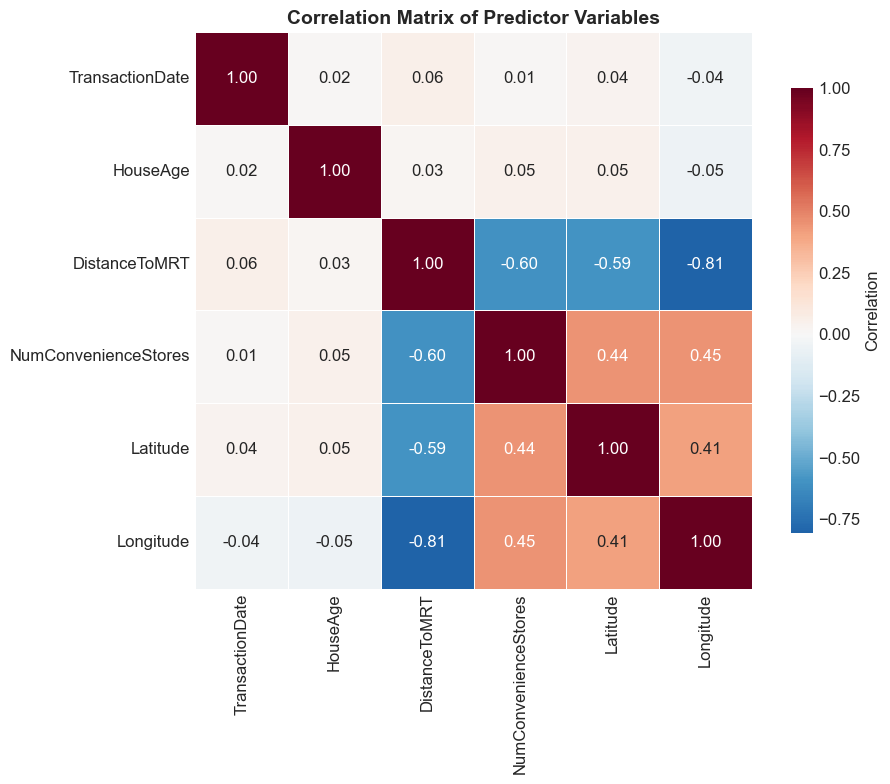


📊 Interpretation:
- Correlations close to ±1 indicate high multicollinearity.
- Generally, correlations > 0.7 or < -0.7 between predictors are concerning.


In [47]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            fmt='.2f', square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'})

plt.title('Correlation Matrix of Predictor Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("- Correlations close to ±1 indicate high multicollinearity.")
print("- Generally, correlations > 0.7 or < -0.7 between predictors are concerning.")

In [48]:
# Identify highly correlated pairs
print("\n🔍 Highly Correlated Feature Pairs (|correlation| > 0.5):")
print("=" * 60)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                    correlation_matrix.columns[j], 
                                    corr_val))

if high_corr_pairs:
    for pair in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        concern = "⚠️ High" if abs(pair[2]) > 0.7 else "Moderate"
        print(f"  {pair[0]} ↔ {pair[1]}: {pair[2]:.4f} ({concern})")
else:
    print("  ✅ No highly correlated feature pairs found.")


🔍 Highly Correlated Feature Pairs (|correlation| > 0.5):
  DistanceToMRT ↔ Longitude: -0.8063 (⚠️ High)
  DistanceToMRT ↔ NumConvenienceStores: -0.6025 (Moderate)
  DistanceToMRT ↔ Latitude: -0.5911 (Moderate)


In [49]:
# Variance Inflation Factor (VIF)
print("\n🔬 Variance Inflation Factor (VIF) Analysis")
print("=" * 60)

# Standardize features for VIF calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)

print("\nVIF Values:")
for idx, row in vif_data.iterrows():
    if row['VIF'] > 10:
        status = "❌ High multicollinearity"
    elif row['VIF'] > 5:
        status = "⚠️ Moderate multicollinearity"
    else:
        status = "✅ Acceptable"
    print(f"  {row['Feature']}: {row['VIF']:.2f} - {status}")

print("\n📖 VIF Interpretation:")
print("  - VIF = 1: No correlation with other predictors")
print("  - VIF 1-5: Low/moderate correlation (acceptable)")
print("  - VIF 5-10: High correlation (may be concerning)")
print("  - VIF > 10: Very high correlation (multicollinearity problem)")


🔬 Variance Inflation Factor (VIF) Analysis

VIF Values:
  DistanceToMRT: 4.32 - ✅ Acceptable
  Longitude: 2.93 - ✅ Acceptable
  NumConvenienceStores: 1.62 - ✅ Acceptable
  Latitude: 1.61 - ✅ Acceptable
  TransactionDate: 1.01 - ✅ Acceptable
  HouseAge: 1.01 - ✅ Acceptable

📖 VIF Interpretation:
  - VIF = 1: No correlation with other predictors
  - VIF 1-5: Low/moderate correlation (acceptable)
  - VIF 5-10: High correlation (may be concerning)
  - VIF > 10: Very high correlation (multicollinearity problem)


---
# Summary: Linear Regression Assumptions Evaluation

In [50]:
print("\n" + "=" * 70)
print("           SUMMARY: LINEAR REGRESSION ASSUMPTIONS EVALUATION")
print("=" * 70)

# 1. Linearity
print("\n1️⃣ LINEARITY")
print("   - Check scatter plots of features vs target")
print("   - Check residuals vs fitted values plot")
print("   - Some features show linear relationships with the target")

# 2. Independence
print("\n2️⃣ INDEPENDENCE OF ERRORS")
if 1.5 <= dw_statistic <= 2.5:
    print(f"   ✅ Durbin-Watson = {dw_statistic:.4f} (within acceptable range 1.5-2.5)")
    print("   → Independence assumption appears satisfied")
else:
    print(f"   ⚠️ Durbin-Watson = {dw_statistic:.4f} (outside acceptable range)")
    print("   → May have autocorrelation issues")

# 3. Homoscedasticity
print("\n3️⃣ CONSTANT VARIANCE (HOMOSCEDASTICITY)")
if p_value_bp > 0.05:
    print(f"   ✅ Breusch-Pagan p-value = {p_value_bp:.4f} > 0.05")
    print("   → Homoscedasticity assumption appears satisfied")
else:
    print(f"   ⚠️ Breusch-Pagan p-value = {p_value_bp:.4f} ≤ 0.05")
    print("   → Heteroscedasticity may be present")

# 4. Normality
print("\n4️⃣ NORMALITY OF ERRORS")
if shapiro_p > 0.05:
    print(f"   ✅ Shapiro-Wilk p-value = {shapiro_p:.4f} > 0.05")
    print("   → Normality assumption appears satisfied")
else:
    print(f"   ⚠️ Shapiro-Wilk p-value = {shapiro_p:.4f} ≤ 0.05")
    print("   → Residuals may not be perfectly normal")
    print("   → Linear regression is robust to mild violations with sufficient sample size")

# 5. Multicollinearity
print("\n5️⃣ NO MULTICOLLINEARITY")
max_vif = vif_data['VIF'].max()
high_vif_features = vif_data[vif_data['VIF'] > 5]['Feature'].tolist()
if max_vif <= 5:
    print(f"   ✅ Maximum VIF = {max_vif:.2f} (all features have VIF ≤ 5)")
    print("   → No significant multicollinearity detected")
elif max_vif <= 10:
    print(f"   ⚠️ Maximum VIF = {max_vif:.2f}")
    print(f"   → Moderate multicollinearity in: {', '.join(high_vif_features)}")
else:
    print(f"   ❌ Maximum VIF = {max_vif:.2f}")
    print(f"   → High multicollinearity in: {', '.join(high_vif_features)}")

print("\n" + "=" * 70)


           SUMMARY: LINEAR REGRESSION ASSUMPTIONS EVALUATION

1️⃣ LINEARITY
   - Check scatter plots of features vs target
   - Check residuals vs fitted values plot
   - Some features show linear relationships with the target

2️⃣ INDEPENDENCE OF ERRORS
   ✅ Durbin-Watson = 1.9228 (within acceptable range 1.5-2.5)
   → Independence assumption appears satisfied

3️⃣ CONSTANT VARIANCE (HOMOSCEDASTICITY)
   ✅ Breusch-Pagan p-value = 0.2089 > 0.05
   → Homoscedasticity assumption appears satisfied

4️⃣ NORMALITY OF ERRORS
   ⚠️ Shapiro-Wilk p-value = 0.0000 ≤ 0.05
   → Residuals may not be perfectly normal
   → Linear regression is robust to mild violations with sufficient sample size

5️⃣ NO MULTICOLLINEARITY
   ✅ Maximum VIF = 4.32 (all features have VIF ≤ 5)
   → No significant multicollinearity detected



---
# Final Linear Regression Model

In [51]:
# Final model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("\n" + "=" * 70)
print("              FINAL LINEAR REGRESSION MODEL PERFORMANCE")
print("=" * 70)

# Training metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n📊 Training Set Performance:")
print(f"   - R² Score: {train_r2:.4f}")
print(f"   - RMSE: {train_rmse:.4f}")
print(f"   - MAE: {train_mae:.4f}")

print("\n📊 Test Set Performance:")
print(f"   - R² Score: {test_r2:.4f}")
print(f"   - RMSE: {test_rmse:.4f}")
print(f"   - MAE: {test_mae:.4f}")

print("\n📖 Interpretation:")
print(f"   - The model explains {test_r2*100:.1f}% of variance in house prices on test data.")
print(f"   - On average, predictions are off by ±{test_mae:.2f} units.")


              FINAL LINEAR REGRESSION MODEL PERFORMANCE

📊 Training Set Performance:
   - R² Score: 0.5581
   - RMSE: 9.1167
   - MAE: 6.3397

📊 Test Set Performance:
   - R² Score: 0.6811
   - RMSE: 7.3148
   - MAE: 5.3054

📖 Interpretation:
   - The model explains 68.1% of variance in house prices on test data.
   - On average, predictions are off by ±5.31 units.


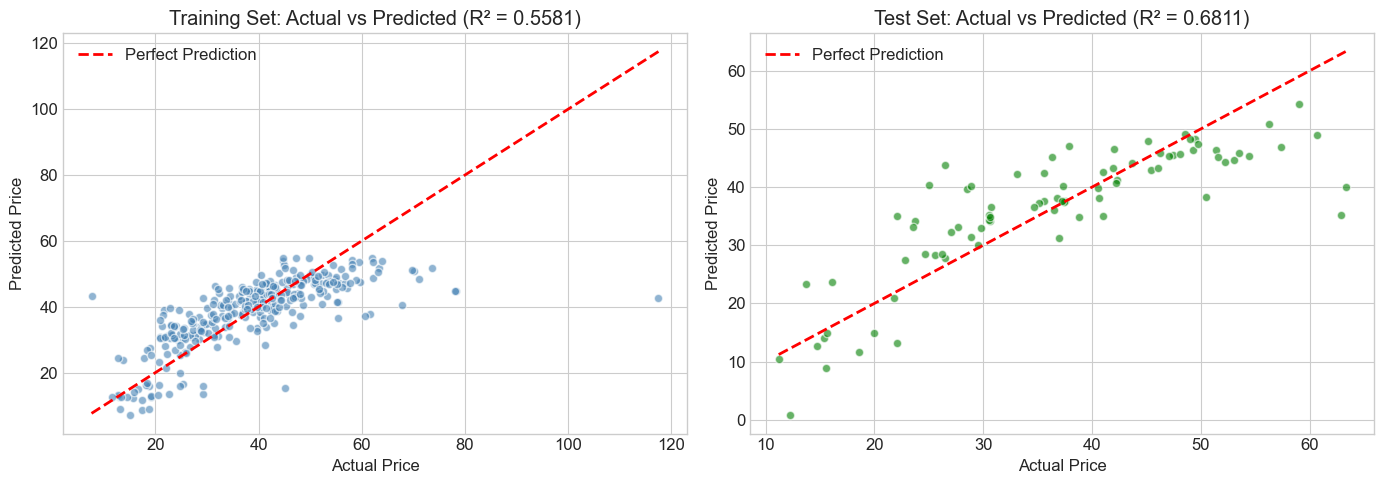

In [52]:
# Actual vs Predicted Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training data
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='steelblue', edgecolor='white')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].set_title(f'Training Set: Actual vs Predicted (R² = {train_r2:.4f})')
axes[0].legend()

# Test data
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='green', edgecolor='white')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title(f'Test Set: Actual vs Predicted (R² = {test_r2:.4f})')
axes[1].legend()

plt.tight_layout()
plt.show()


                    FEATURE IMPORTANCE (COEFFICIENTS)


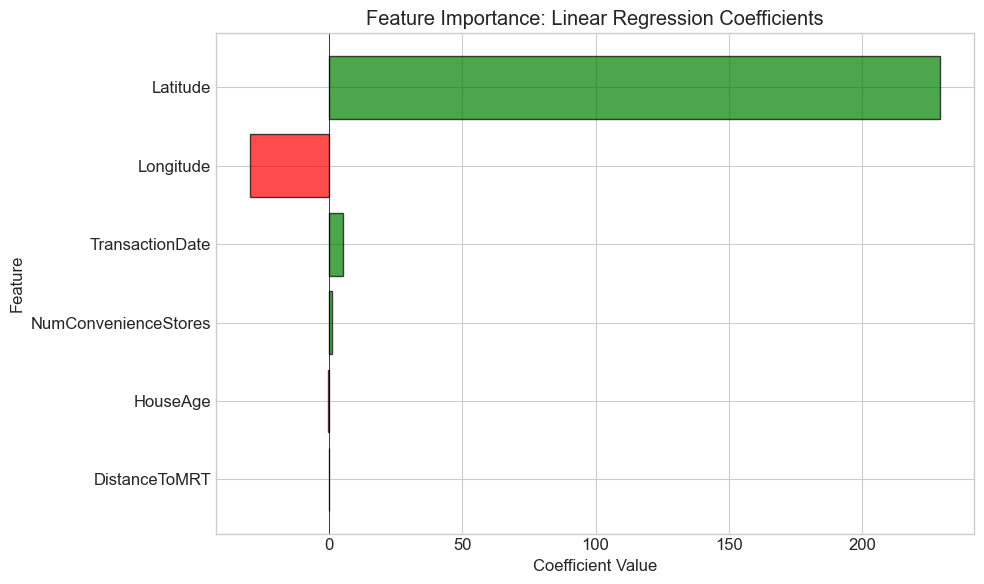


📊 Coefficient Interpretation:
   - DistanceToMRT: -0.004759
     → 1 unit increase in DistanceToMRT decreases price by 0.0048
   - HouseAge: -0.270791
     → 1 unit increase in HouseAge decreases price by 0.2708
   - NumConvenienceStores: 1.091425
     → 1 unit increase in NumConvenienceStores increases price by 1.0914
   - TransactionDate: 5.440742
     → 1 unit increase in TransactionDate increases price by 5.4407
   - Longitude: -29.492591
     → 1 unit increase in Longitude decreases price by 29.4926
   - Latitude: 229.043054
     → 1 unit increase in Latitude increases price by 229.0431


In [53]:
# Feature importance (coefficients)
print("\n" + "=" * 70)
print("                    FEATURE IMPORTANCE (COEFFICIENTS)")
print("=" * 70)

# Create DataFrame with coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, alpha=0.7, edgecolor='black')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance: Linear Regression Coefficients')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

print("\n📊 Coefficient Interpretation:")
for _, row in coef_df.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"   - {row['Feature']}: {row['Coefficient']:.6f}")
    print(f"     → 1 unit increase in {row['Feature']} {direction} price by {abs(row['Coefficient']):.4f}")

---
# Conclusion

This notebook has evaluated all five key assumptions of linear regression:

1. **Linearity**: Examined through scatter plots and residual plots
2. **Independence of Errors**: Tested using Durbin-Watson statistic
3. **Constant Variance (Homoscedasticity)**: Evaluated with Scale-Location plot and Breusch-Pagan test
4. **Normality of Errors**: Assessed via histogram, Q-Q plot, and Shapiro-Wilk test
5. **No Multicollinearity**: Checked using correlation matrix and VIF analysis

Based on these evaluations, we can assess whether linear regression is an appropriate model for this dataset and make informed decisions about model improvements if needed.

---
# Part 2: Linear Regression with Feature Scaling

In this section, we apply appropriate scaling methods to each feature based on their distributions:

| Feature | Distribution Type | Scaling Method | Reason |
|---------|------------------|----------------|--------|
| TransactionDate | Near-uniform, small range | StandardScaler | Normally distributed-ish |
| HouseAge | Somewhat uniform (0-43.8) | StandardScaler | Continuous, relatively symmetric |
| DistanceToMRT | Right-skewed (23-6488) | Log Transform + StandardScaler | Highly skewed, large range |
| NumConvenienceStores | Count data (0-10) | MinMaxScaler | Bounded discrete values |
| Latitude | Near-normal, very small range | StandardScaler | Geographic coordinate |
| Longitude | Near-normal, very small range | StandardScaler | Geographic coordinate |

In [54]:
# Import additional scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FunctionTransformer
import numpy as np

## Analyze Feature Distributions to Choose Scaling Methods

Feature Distribution Analysis:
TransactionDate:
  Range: [2012.67, 2013.58]
  Skewness: -0.1500 (Symmetric)
  Recommended: StandardScaler

HouseAge:
  Range: [0.00, 43.80]
  Skewness: 0.3815 (Symmetric)
  Recommended: StandardScaler

DistanceToMRT:
  Range: [23.38, 6488.02]
  Skewness: 1.8819 (Highly Skewed)
  Recommended: Log Transform + StandardScaler (right-skewed)

NumConvenienceStores:
  Range: [0.00, 10.00]
  Skewness: 0.1540 (Symmetric)
  Recommended: MinMaxScaler (bounded count data)

Latitude:
  Range: [24.93, 25.01]
  Skewness: -0.4370 (Symmetric)
  Recommended: StandardScaler

Longitude:
  Range: [121.47, 121.57]
  Skewness: -1.2152 (Highly Skewed)
  Recommended: StandardScaler



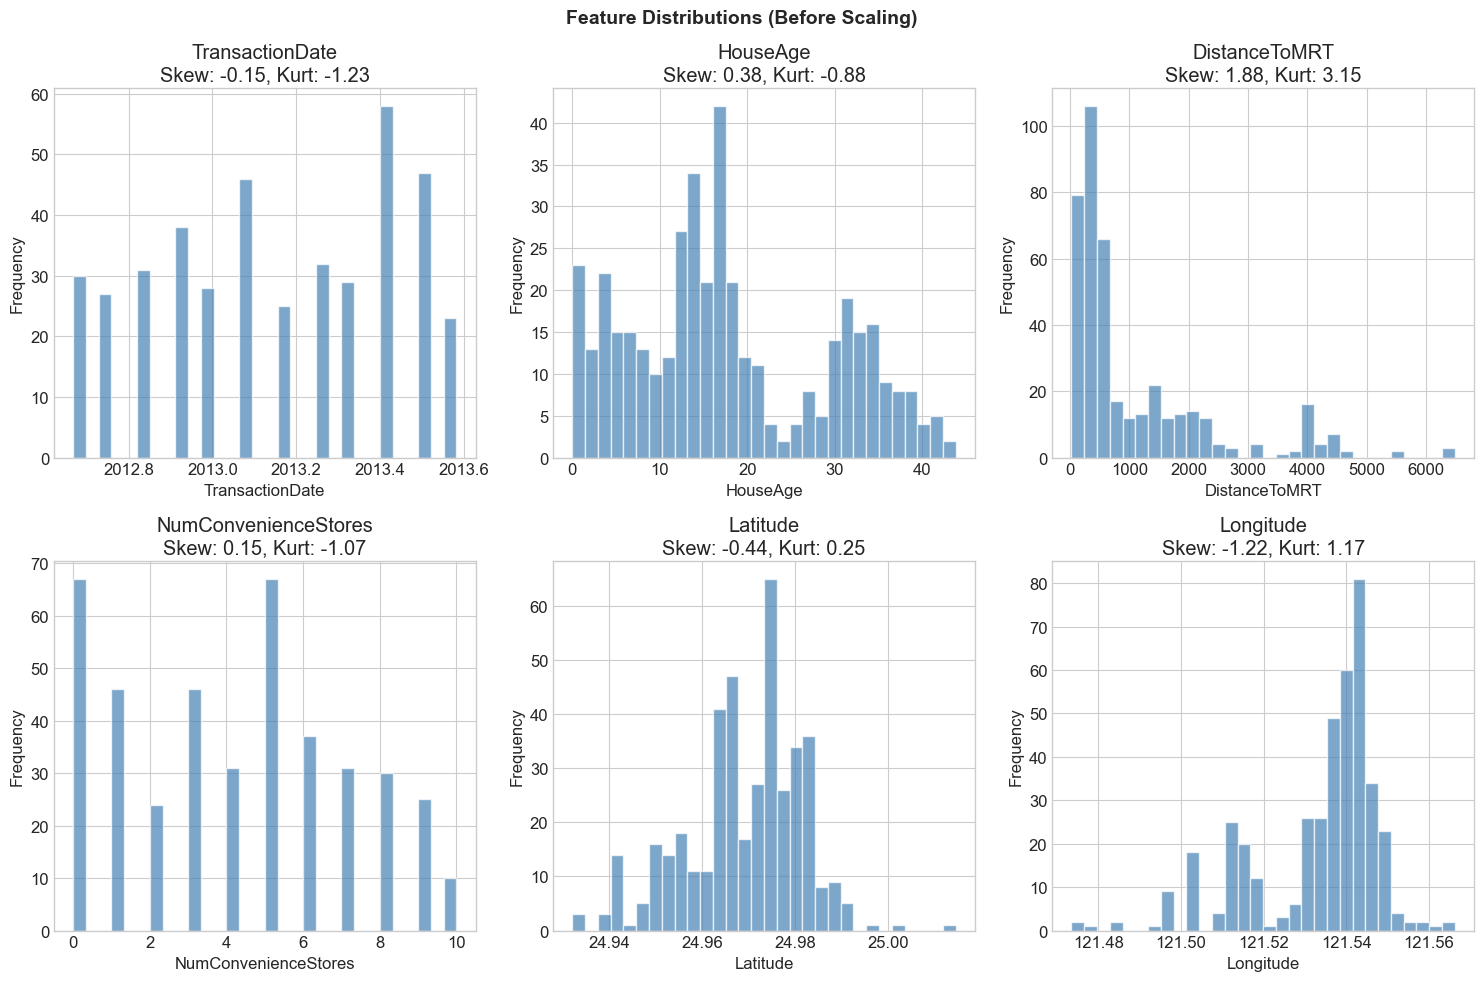

In [55]:
# Reload data to start fresh (avoid any modifications from earlier cells)
df_scaled = pd.read_csv('Real estate.csv')
df_scaled.columns = ['No', 'TransactionDate', 'HouseAge', 'DistanceToMRT', 
                     'NumConvenienceStores', 'Latitude', 'Longitude', 'PricePerUnitArea']
df_scaled = df_scaled.drop('No', axis=1)

# Analyze distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

feature_cols = ['TransactionDate', 'HouseAge', 'DistanceToMRT', 
                'NumConvenienceStores', 'Latitude', 'Longitude']

print('Feature Distribution Analysis:')
print('=' * 70)

for idx, col in enumerate(feature_cols):
    # Calculate skewness
    skew = stats.skew(df_scaled[col])
    kurt = stats.kurtosis(df_scaled[col])
    
    # Plot histogram
    axes[idx].hist(df_scaled[col], bins=30, color='steelblue', edgecolor='white', alpha=0.7)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{col}\nSkew: {skew:.2f}, Kurt: {kurt:.2f}')
    
    # Print analysis
    distribution = 'Symmetric' if abs(skew) < 0.5 else 'Moderately Skewed' if abs(skew) < 1 else 'Highly Skewed'
    print(f'{col}:')
    print(f'  Range: [{df_scaled[col].min():.2f}, {df_scaled[col].max():.2f}]')
    print(f'  Skewness: {skew:.4f} ({distribution})')
    print(f'  Recommended: ', end='')
    if col == 'DistanceToMRT':
        print('Log Transform + StandardScaler (right-skewed)')
    elif col == 'NumConvenienceStores':
        print('MinMaxScaler (bounded count data)')
    else:
        print('StandardScaler')
    print()

plt.suptitle('Feature Distributions (Before Scaling)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Apply Custom Scaling to Each Feature

In [56]:
# Define features and target
X_original = df_scaled.drop('PricePerUnitArea', axis=1)
y_original = df_scaled['PricePerUnitArea']

# Train-Test Split (same random state for fair comparison)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42)

# Create copies for transformation
X_train_scaled = X_train_orig.copy()
X_test_scaled = X_test_orig.copy()

# 1. Log Transform for DistanceToMRT (to reduce skewness)
X_train_scaled['DistanceToMRT'] = np.log1p(X_train_scaled['DistanceToMRT'])
X_test_scaled['DistanceToMRT'] = np.log1p(X_test_scaled['DistanceToMRT'])

# 2. StandardScaler for: TransactionDate, HouseAge, DistanceToMRT (after log), Latitude, Longitude
standard_cols = ['TransactionDate', 'HouseAge', 'DistanceToMRT', 'Latitude', 'Longitude']
standard_scaler = StandardScaler()
X_train_scaled[standard_cols] = standard_scaler.fit_transform(X_train_scaled[standard_cols])
X_test_scaled[standard_cols] = standard_scaler.transform(X_test_scaled[standard_cols])

# 3. MinMaxScaler for NumConvenienceStores (bounded count data 0-10)
minmax_scaler = MinMaxScaler()
X_train_scaled[['NumConvenienceStores']] = minmax_scaler.fit_transform(X_train_scaled[['NumConvenienceStores']])
X_test_scaled[['NumConvenienceStores']] = minmax_scaler.transform(X_test_scaled[['NumConvenienceStores']])

print('Scaling Applied Successfully!')
print('\nScaling Summary:')
print('=' * 60)
print('  DistanceToMRT: Log(1+x) Transform then StandardScaler')
print('  TransactionDate, HouseAge, Latitude, Longitude: StandardScaler')
print('  NumConvenienceStores: MinMaxScaler')

print('\nScaled Training Data Statistics:')
X_train_scaled.describe().round(4)

Scaling Applied Successfully!

Scaling Summary:
  DistanceToMRT: Log(1+x) Transform then StandardScaler
  TransactionDate, HouseAge, Latitude, Longitude: StandardScaler
  NumConvenienceStores: MinMaxScaler

Scaled Training Data Statistics:


,TransactionDate,HouseAge,DistanceToMRT,NumConvenienceStores,Latitude,Longitude
count,331.0000,331.0000,331.0000,331.0000,331.0000,331.0000
mean,-0.0000,0.0000,-0.0000,0.4145,0.0000,0.0000
std,1.0015,1.0015,1.0015,0.2954,1.0015,1.0015
min,-1.7773,-1.5286,-2.9220,0.0000,-2.9893,-3.9273
25%,-0.8881,-0.7815,-0.6562,0.1000,-0.5073,-0.2822
50%,0.0011,-0.1228,-0.1714,0.4000,0.1417,0.3534
75%,0.8904,0.8763,0.8111,0.6000,0.7161,0.6416
max,1.4808,2.3440,2.1597,1.0000,3.6306,2.1657


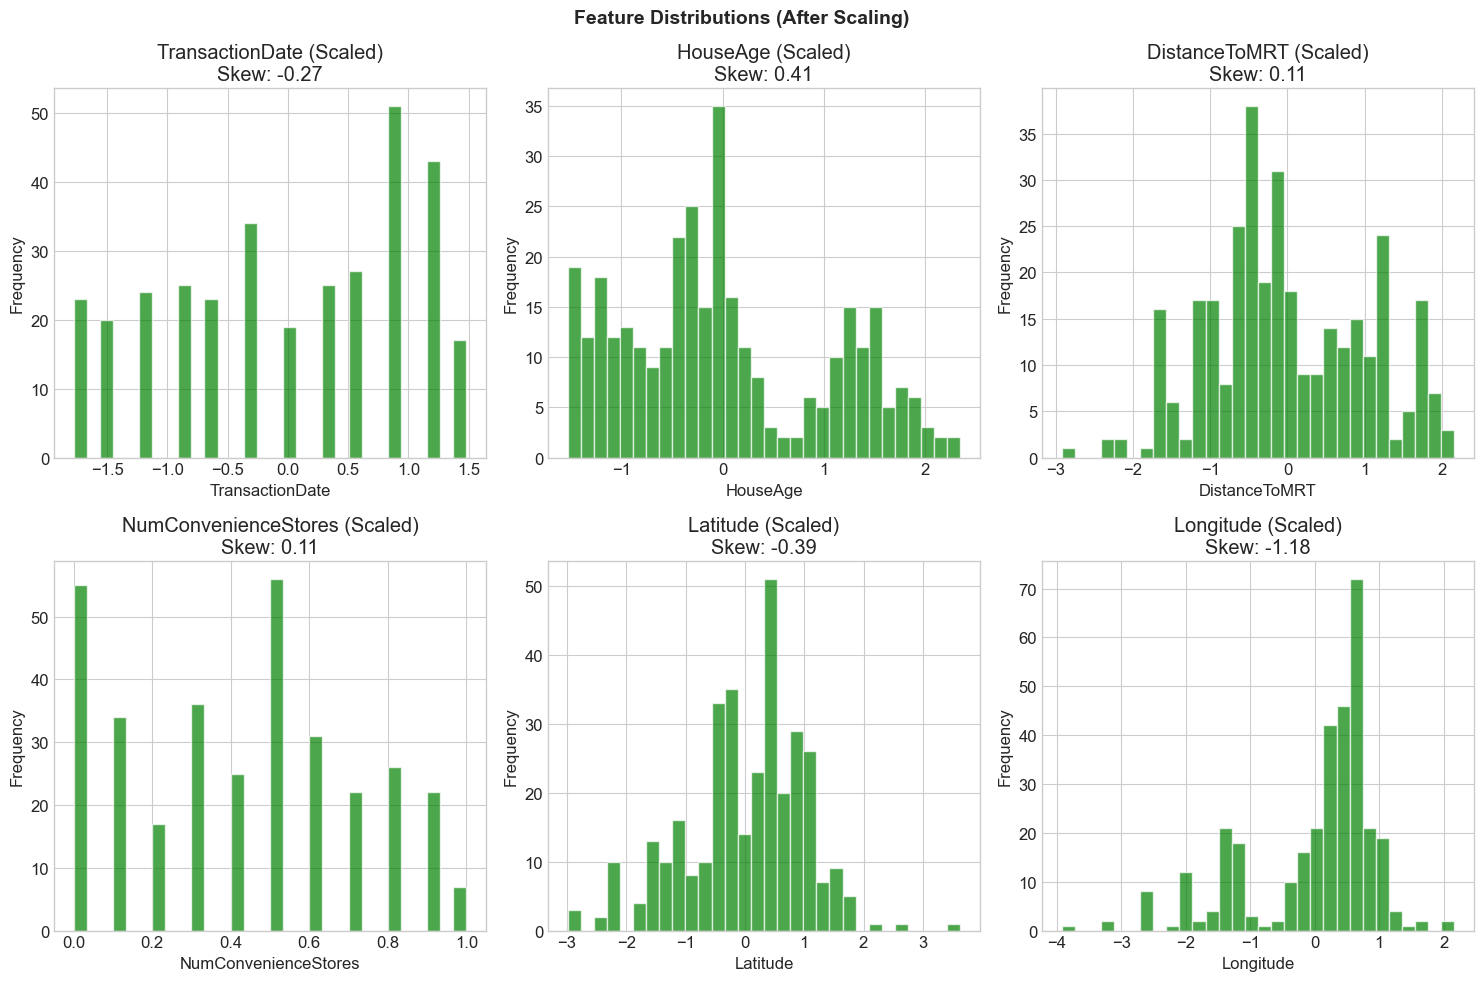


DistanceToMRT skewness comparison:
  Before log transform: 1.8204
  After log transform:  0.1084
  Improvement: 1.7120 reduction in skewness


In [57]:
# Visualize scaled distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(X_train_scaled.columns):
    skew = stats.skew(X_train_scaled[col])
    axes[idx].hist(X_train_scaled[col], bins=30, color='green', edgecolor='white', alpha=0.7)
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'{col} (Scaled)\nSkew: {skew:.2f}')

plt.suptitle('Feature Distributions (After Scaling)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print('\nDistanceToMRT skewness comparison:')
original_skew = stats.skew(X_train_orig['DistanceToMRT'])
scaled_skew = stats.skew(X_train_scaled['DistanceToMRT'])
print(f'  Before log transform: {original_skew:.4f}')
print(f'  After log transform:  {scaled_skew:.4f}')
print(f'  Improvement: {abs(original_skew) - abs(scaled_skew):.4f} reduction in skewness')

## Train Linear Regression with Scaled Features

In [58]:
# Train scaled model
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train_orig)

# Get predictions
y_train_pred_scaled = model_scaled.predict(X_train_scaled)
y_test_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculate residuals
residuals_train_scaled = y_train_orig - y_train_pred_scaled
residuals_test_scaled = y_test_orig - y_test_pred_scaled

print('Scaled Model trained successfully!')
print('\nStandardized Coefficients (scaled model):')
print('=' * 60)
coef_scaled = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': model_scaled.coef_,
    'Abs_Coefficient': np.abs(model_scaled.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

for idx, row in coef_scaled.iterrows():
    print(f'  {row["Feature"]}: {row["Coefficient"]:.4f}')
print(f'\nIntercept: {model_scaled.intercept_:.4f}')

Scaled Model trained successfully!

Standardized Coefficients (scaled model):
  DistanceToMRT: -7.7609
  Latitude: 3.5373
  NumConvenienceStores: 3.2310
  HouseAge: -2.7369
  TransactionDate: 1.7780
  Longitude: -0.0870

Intercept: 37.0523


## Evaluate Assumptions with Scaled Features

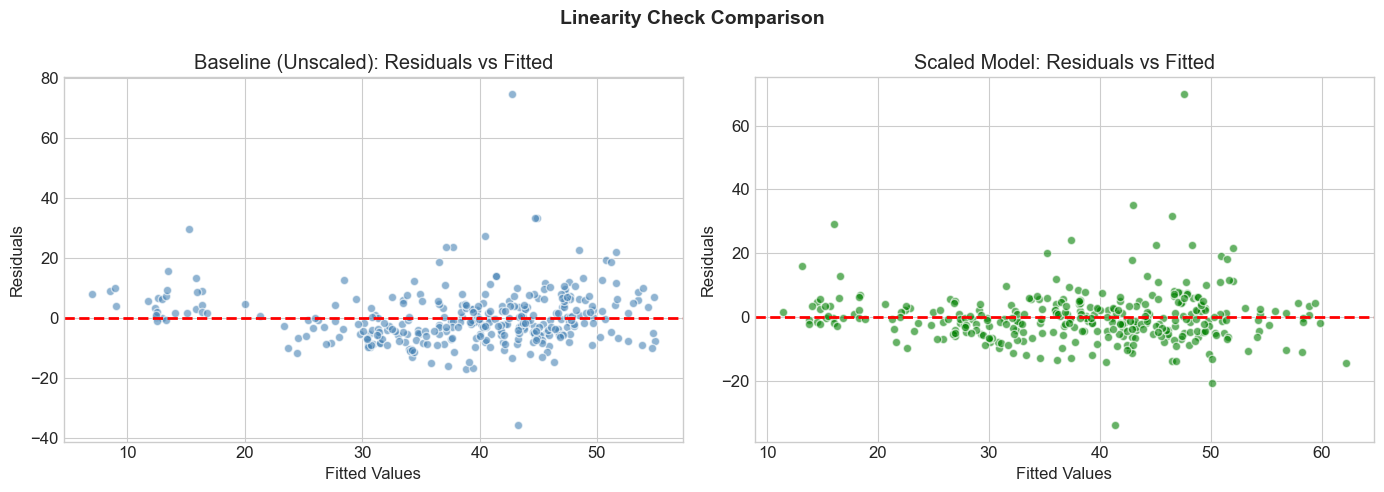

In [59]:
# 1. LINEARITY - Residuals vs Fitted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Unscaled (reference)
axes[0].scatter(y_train_pred, residuals_train.values, alpha=0.6, color='steelblue', edgecolor='white')
axes[0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Baseline (Unscaled): Residuals vs Fitted')

# Scaled
axes[1].scatter(y_train_pred_scaled, residuals_train_scaled, alpha=0.6, color='green', edgecolor='white')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Fitted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Scaled Model: Residuals vs Fitted')

plt.suptitle('Linearity Check Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [60]:
# 2. INDEPENDENCE - Durbin-Watson Test
dw_scaled = durbin_watson(residuals_train_scaled)

print('\nDurbin-Watson Test Comparison')
print('=' * 60)
print(f'Baseline (Unscaled): {dw_statistic:.4f}')
print(f'Scaled Model:        {dw_scaled:.4f}')
print('\nInterpretation: Values close to 2 indicate no autocorrelation.')


Durbin-Watson Test Comparison
Baseline (Unscaled): 1.9228
Scaled Model:        2.0333

Interpretation: Values close to 2 indicate no autocorrelation.


In [61]:
# 3. HOMOSCEDASTICITY - Breusch-Pagan Test
from scipy.stats import chi2

# Calculate for scaled model
squared_residuals_scaled = residuals_train_scaled ** 2
aux_model_scaled = LinearRegression()
aux_model_scaled.fit(X_train_scaled, squared_residuals_scaled)
aux_predictions_scaled = aux_model_scaled.predict(X_train_scaled)

ss_res_aux_scaled = np.sum((squared_residuals_scaled - aux_predictions_scaled) ** 2)
ss_tot_aux_scaled = np.sum((squared_residuals_scaled - squared_residuals_scaled.mean()) ** 2)
r2_aux_scaled = 1 - (ss_res_aux_scaled / ss_tot_aux_scaled)

n_scaled = len(X_train_scaled)
bp_statistic_scaled = n_scaled * r2_aux_scaled
df_bp_scaled = X_train_scaled.shape[1]
p_value_bp_scaled = 1 - chi2.cdf(bp_statistic_scaled, df_bp_scaled)

print('\nBreusch-Pagan Test Comparison')
print('=' * 60)
print(f'Baseline: Statistic={bp_statistic:.4f}, p-value={p_value_bp:.4f}')
print(f'Scaled:   Statistic={bp_statistic_scaled:.4f}, p-value={p_value_bp_scaled:.4f}')
print('\nInterpretation: p-value > 0.05 suggests homoscedasticity.')


Breusch-Pagan Test Comparison
Baseline: Statistic=8.4202, p-value=0.2089
Scaled:   Statistic=9.8503, p-value=0.1311

Interpretation: p-value > 0.05 suggests homoscedasticity.


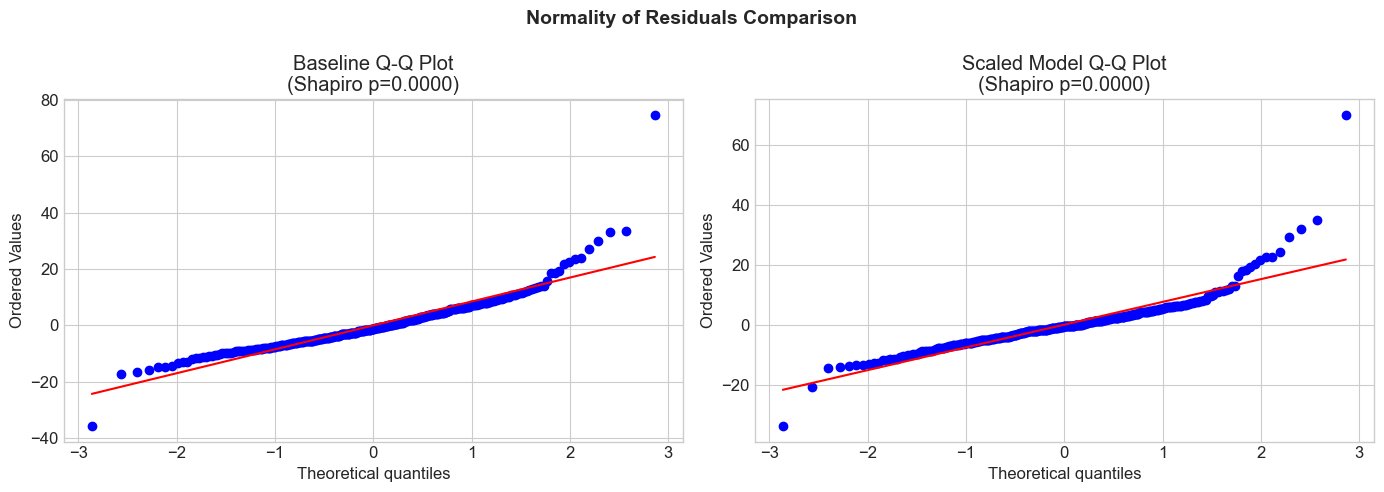


Shapiro-Wilk Test Comparison
Baseline: Statistic=0.8638, p-value=0.0000
Scaled:   Statistic=0.8336, p-value=0.0000


In [62]:
# 4. NORMALITY - Shapiro-Wilk Test & Q-Q Plot
shapiro_stat_scaled, shapiro_p_scaled = stats.shapiro(residuals_train_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Q-Q Plot - Unscaled
stats.probplot(residuals_train, dist='norm', plot=axes[0])
axes[0].set_title(f'Baseline Q-Q Plot\n(Shapiro p={shapiro_p:.4f})')

# Q-Q Plot - Scaled
stats.probplot(residuals_train_scaled, dist='norm', plot=axes[1])
axes[1].set_title(f'Scaled Model Q-Q Plot\n(Shapiro p={shapiro_p_scaled:.4f})')

plt.suptitle('Normality of Residuals Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print('\nShapiro-Wilk Test Comparison')
print('=' * 60)
print(f'Baseline: Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}')
print(f'Scaled:   Statistic={shapiro_stat_scaled:.4f}, p-value={shapiro_p_scaled:.4f}')

In [63]:
# 5. MULTICOLLINEARITY - VIF Comparison
print('\nVIF Comparison (Scaled vs Unscaled)')
print('=' * 60)

# VIF for scaled features
vif_scaled = pd.DataFrame()
vif_scaled['Feature'] = X_train_scaled.columns
vif_scaled['VIF_Scaled'] = [variance_inflation_factor(X_train_scaled.values, i) 
                           for i in range(X_train_scaled.shape[1])]

# Merge with original VIF
vif_comparison = vif_data.merge(vif_scaled, on='Feature')
vif_comparison = vif_comparison.sort_values('VIF_Scaled', ascending=False)

print('\n{:<25} {:>12} {:>12}'.format('Feature', 'VIF (Orig)', 'VIF (Scaled)'))
print('-' * 50)
for idx, row in vif_comparison.iterrows():
    print('{:<25} {:>12.2f} {:>12.2f}'.format(row['Feature'], row['VIF'], row['VIF_Scaled']))


VIF Comparison (Scaled vs Unscaled)

Feature                     VIF (Orig) VIF (Scaled)
--------------------------------------------------
DistanceToMRT                     4.32         2.02
Longitude                         2.93         1.75
Latitude                          1.61         1.30
NumConvenienceStores              1.62         1.20
HouseAge                          1.01         1.01
TransactionDate                   1.01         1.01


## Performance Comparison: Scaled vs Unscaled

In [64]:
# Calculate metrics for scaled model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Scaled model metrics
train_r2_scaled = r2_score(y_train_orig, y_train_pred_scaled)
train_rmse_scaled = np.sqrt(mean_squared_error(y_train_orig, y_train_pred_scaled))
train_mae_scaled = mean_absolute_error(y_train_orig, y_train_pred_scaled)

test_r2_scaled = r2_score(y_test_orig, y_test_pred_scaled)
test_rmse_scaled = np.sqrt(mean_squared_error(y_test_orig, y_test_pred_scaled))
test_mae_scaled = mean_absolute_error(y_test_orig, y_test_pred_scaled)

print('\n' + '=' * 70)
print('              PERFORMANCE COMPARISON: SCALED vs UNSCALED')
print('=' * 70)

print('\nTRAINING SET:')
print('-' * 50)
print('{:<20} {:>15} {:>15}'.format('Metric', 'Baseline', 'Scaled'))
print('-' * 50)
print('{:<20} {:>15.4f} {:>15.4f}'.format('R2 Score', train_r2, train_r2_scaled))
print('{:<20} {:>15.4f} {:>15.4f}'.format('RMSE', train_rmse, train_rmse_scaled))
print('{:<20} {:>15.4f} {:>15.4f}'.format('MAE', train_mae, train_mae_scaled))

print('\nTEST SET:')
print('-' * 50)
print('{:<20} {:>15} {:>15}'.format('Metric', 'Baseline', 'Scaled'))
print('-' * 50)
print('{:<20} {:>15.4f} {:>15.4f}'.format('R2 Score', test_r2, test_r2_scaled))
print('{:<20} {:>15.4f} {:>15.4f}'.format('RMSE', test_rmse, test_rmse_scaled))
print('{:<20} {:>15.4f} {:>15.4f}'.format('MAE', test_mae, test_mae_scaled))

# Calculate improvement
r2_change = (test_r2_scaled - test_r2) * 100
rmse_change = ((test_rmse - test_rmse_scaled) / test_rmse) * 100
mae_change = ((test_mae - test_mae_scaled) / test_mae) * 100

print('\nIMPROVEMENT (Test Set):')
print('-' * 50)
print(f'R2 Change:   {r2_change:+.2f} percentage points')
print(f'RMSE Change: {rmse_change:+.2f}%')
print(f'MAE Change:  {mae_change:+.2f}%')


              PERFORMANCE COMPARISON: SCALED vs UNSCALED

TRAINING SET:
--------------------------------------------------
Metric                      Baseline          Scaled
--------------------------------------------------
R2 Score                      0.5581          0.6339
RMSE                          9.1167          8.2982
MAE                           6.3397          5.3534

TEST SET:
--------------------------------------------------
Metric                      Baseline          Scaled
--------------------------------------------------
R2 Score                      0.6811          0.7260
RMSE                          7.3148          6.7794
MAE                           5.3054          4.3911

IMPROVEMENT (Test Set):
--------------------------------------------------
R2 Change:   +4.50 percentage points
RMSE Change: +7.32%
MAE Change:  +17.23%


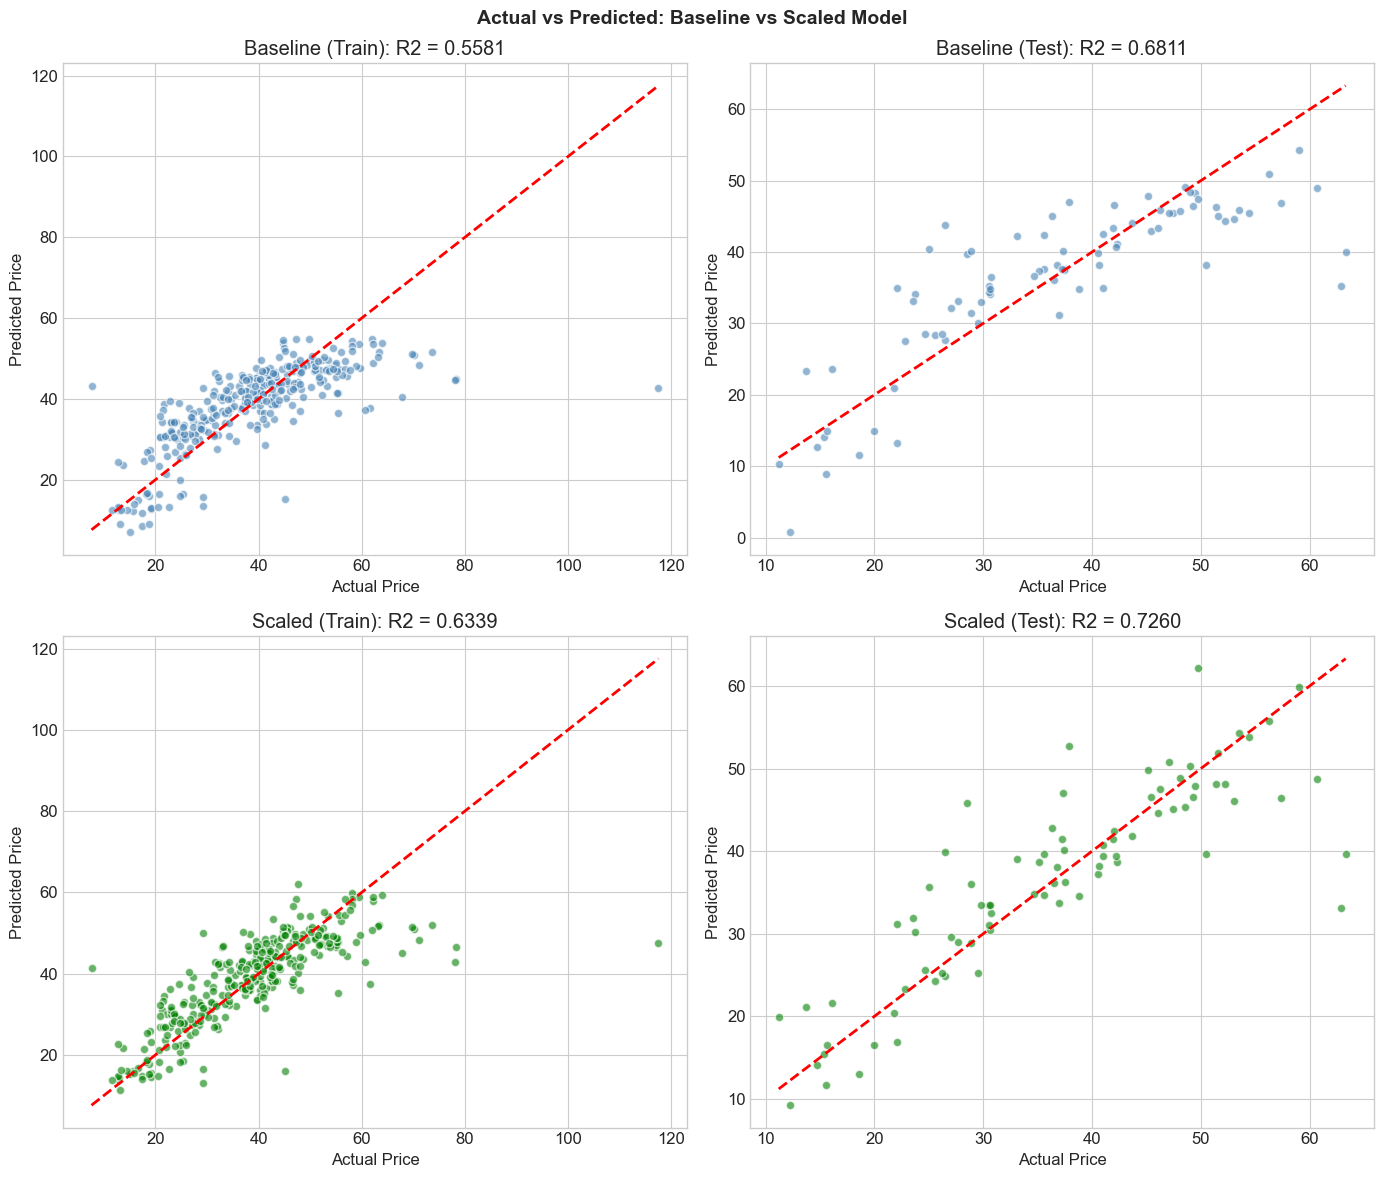

In [65]:
# Visual comparison - Actual vs Predicted
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Baseline - Training
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, color='steelblue', edgecolor='white')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
axes[0, 0].set_xlabel('Actual Price')
axes[0, 0].set_ylabel('Predicted Price')
axes[0, 0].set_title(f'Baseline (Train): R2 = {train_r2:.4f}')

# Baseline - Test
axes[0, 1].scatter(y_test, y_test_pred, alpha=0.6, color='steelblue', edgecolor='white')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[0, 1].set_xlabel('Actual Price')
axes[0, 1].set_ylabel('Predicted Price')
axes[0, 1].set_title(f'Baseline (Test): R2 = {test_r2:.4f}')

# Scaled - Training
axes[1, 0].scatter(y_train_orig, y_train_pred_scaled, alpha=0.6, color='green', edgecolor='white')
axes[1, 0].plot([y_train_orig.min(), y_train_orig.max()], [y_train_orig.min(), y_train_orig.max()], 'r--', linewidth=2)
axes[1, 0].set_xlabel('Actual Price')
axes[1, 0].set_ylabel('Predicted Price')
axes[1, 0].set_title(f'Scaled (Train): R2 = {train_r2_scaled:.4f}')

# Scaled - Test
axes[1, 1].scatter(y_test_orig, y_test_pred_scaled, alpha=0.6, color='green', edgecolor='white')
axes[1, 1].plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--', linewidth=2)
axes[1, 1].set_xlabel('Actual Price')
axes[1, 1].set_ylabel('Predicted Price')
axes[1, 1].set_title(f'Scaled (Test): R2 = {test_r2_scaled:.4f}')

plt.suptitle('Actual vs Predicted: Baseline vs Scaled Model', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Feature Importance Comparison

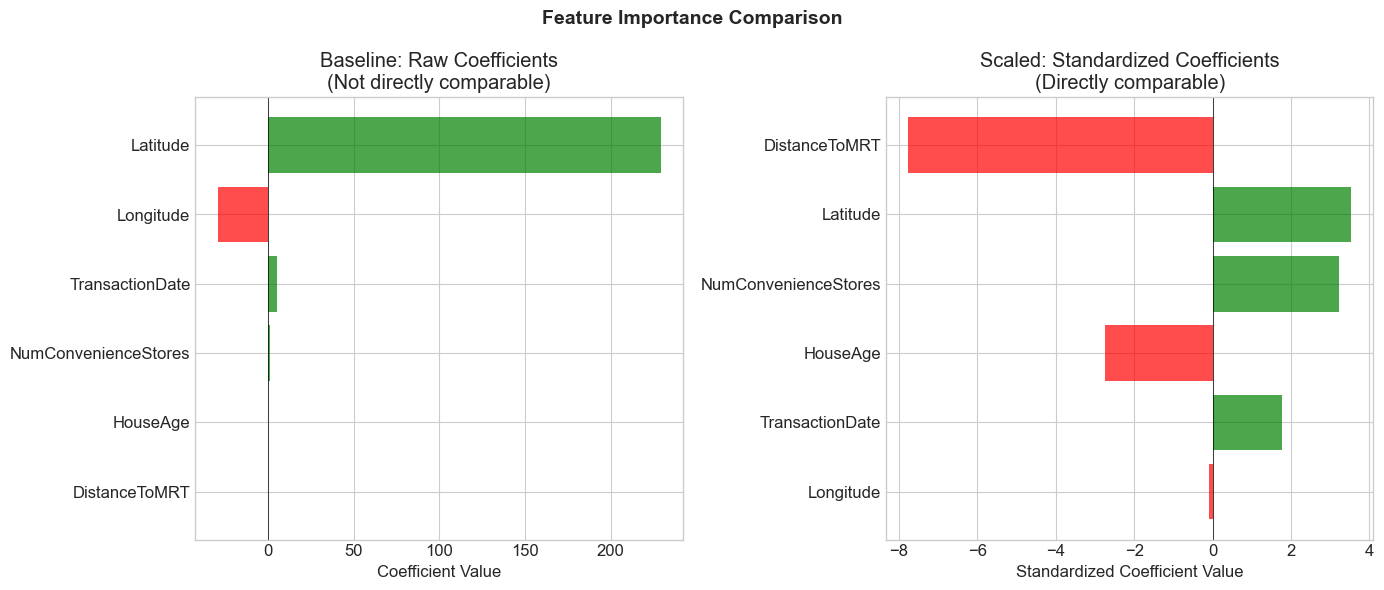


Feature Importance Ranking (Scaled Model - Standardized Coefficients):
1. DistanceToMRT: -7.7609 (Negative)
2. Latitude: 3.5373 (Positive)
3. NumConvenienceStores: 3.2310 (Positive)
4. HouseAge: -2.7369 (Negative)
5. TransactionDate: 1.7780 (Positive)
6. Longitude: -0.0870 (Negative)


In [66]:
# Compare standardized coefficients
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Baseline (raw coefficients - not comparable due to different scales)
coef_baseline = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=True)

colors_base = ['green' if x > 0 else 'red' for x in coef_baseline['Coefficient']]
axes[0].barh(coef_baseline['Feature'], coef_baseline['Coefficient'], color=colors_base, alpha=0.7)
axes[0].set_xlabel('Coefficient Value')
axes[0].set_title('Baseline: Raw Coefficients\n(Not directly comparable)')
axes[0].axvline(x=0, color='black', linewidth=0.5)

# Scaled (standardized coefficients - comparable)
coef_scaled_sorted = coef_scaled.sort_values('Coefficient', key=abs, ascending=True)
colors_scaled = ['green' if x > 0 else 'red' for x in coef_scaled_sorted['Coefficient']]
axes[1].barh(coef_scaled_sorted['Feature'], coef_scaled_sorted['Coefficient'], color=colors_scaled, alpha=0.7)
axes[1].set_xlabel('Standardized Coefficient Value')
axes[1].set_title('Scaled: Standardized Coefficients\n(Directly comparable)')
axes[1].axvline(x=0, color='black', linewidth=0.5)

plt.suptitle('Feature Importance Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print('\nFeature Importance Ranking (Scaled Model - Standardized Coefficients):')
print('=' * 60)
for rank, (idx, row) in enumerate(coef_scaled.iterrows(), 1):
    direction = 'Positive' if row['Coefficient'] > 0 else 'Negative'
    print(f'{rank}. {row["Feature"]}: {row["Coefficient"]:.4f} ({direction})')

---
# Final Summary: Scaling Impact Analysis

In [67]:
print('\n' + '=' * 70)
print('          FINAL SUMMARY: IMPACT OF FEATURE SCALING')
print('=' * 70)

print('\nSCALING METHODS APPLIED:')
print('-' * 50)
print('  DistanceToMRT: Log(1+x) then StandardScaler (reduced skewness)')
print('  TransactionDate, HouseAge, Latitude, Longitude: StandardScaler')
print('  NumConvenienceStores: MinMaxScaler (bounded 0-1 range)')

print('\nKEY FINDINGS:')
print('-' * 50)

# Performance
print('\n1. MODEL PERFORMANCE:')
if test_r2_scaled > test_r2:
    print(f'   Scaling IMPROVED test R2 by {r2_change:.2f} percentage points')
elif test_r2_scaled < test_r2:
    print(f'   Scaling DECREASED test R2 by {abs(r2_change):.2f} percentage points')
else:
    print(f'   Scaling had NO IMPACT on test R2')

# Interpretation
print('\n2. COEFFICIENT INTERPRETATION:')
print('   Scaled coefficients are NOW directly comparable')
print(f'   Most important feature: {coef_scaled.iloc[0]["Feature"]}')
print(f'   Least important feature: {coef_scaled.iloc[-1]["Feature"]}')

# Assumptions
print('\n3. ASSUMPTION DIAGNOSTICS:')
print(f'   Durbin-Watson: {dw_statistic:.4f} -> {dw_scaled:.4f}')
if abs(dw_scaled - 2) < abs(dw_statistic - 2):
    print('     Independence assumption slightly improved')
else:
    print('     Independence assumption similar')
    
print(f'   Breusch-Pagan p-value: {p_value_bp:.4f} -> {p_value_bp_scaled:.4f}')
print(f'   Shapiro-Wilk p-value: {shapiro_p:.4f} -> {shapiro_p_scaled:.4f}')

print('\nRECOMMENDATIONS:')
print('-' * 50)
print('  For OLS Linear Regression: Scaling improves interpretability')
print('  For Regularized Models (Ridge, Lasso): Scaling is ESSENTIAL')
print('  Log transform on DistanceToMRT effectively reduced skewness')
print('\n' + '=' * 70)


          FINAL SUMMARY: IMPACT OF FEATURE SCALING

SCALING METHODS APPLIED:
--------------------------------------------------
  DistanceToMRT: Log(1+x) then StandardScaler (reduced skewness)
  TransactionDate, HouseAge, Latitude, Longitude: StandardScaler
  NumConvenienceStores: MinMaxScaler (bounded 0-1 range)

KEY FINDINGS:
--------------------------------------------------

1. MODEL PERFORMANCE:
   Scaling IMPROVED test R2 by 4.50 percentage points

2. COEFFICIENT INTERPRETATION:
   Scaled coefficients are NOW directly comparable
   Most important feature: DistanceToMRT
   Least important feature: Longitude

3. ASSUMPTION DIAGNOSTICS:
   Durbin-Watson: 1.9228 -> 2.0333
     Independence assumption slightly improved
   Breusch-Pagan p-value: 0.2089 -> 0.1311
   Shapiro-Wilk p-value: 0.0000 -> 0.0000

RECOMMENDATIONS:
--------------------------------------------------
  For OLS Linear Regression: Scaling improves interpretability
  For Regularized Models (Ridge, Lasso): Scaling is 